<a href="https://colab.research.google.com/github/razoncdr/Digital-Image-Processing/blob/main/2019331512_DIP_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir /content/kaggle_data


Mounted at /content/drive
cp: cannot stat 'kaggle.json': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Check if kaggle.json exists
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi


bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


In [ ]:
# Download and unzip the dataset
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [00:12<00:00, 199MB/s]
100% 2.40G/2.40G [00:12<00:00, 207MB/s]
Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaIS

In [ ]:
from skimage import io
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [ ]:
# Helper function to display images
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

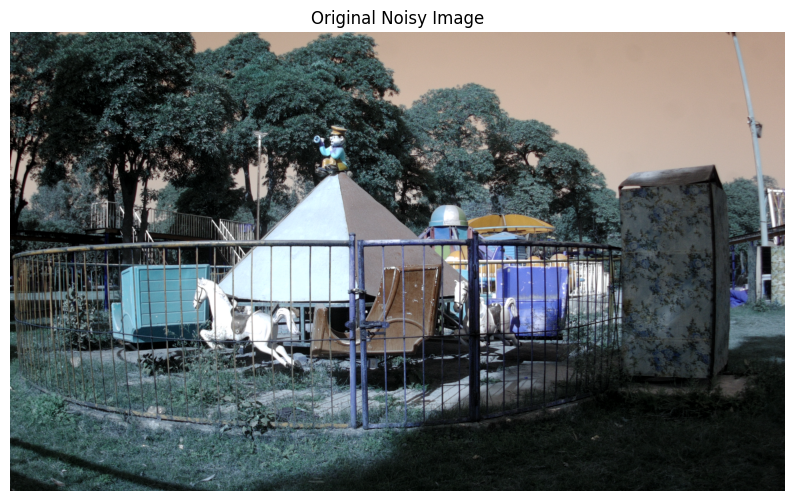

In [ ]:
# Load the noisy image
image_path = "/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png"
image = io.imread(image_path)

# Display the original noisy image
show_image('Original Noisy Image', image)

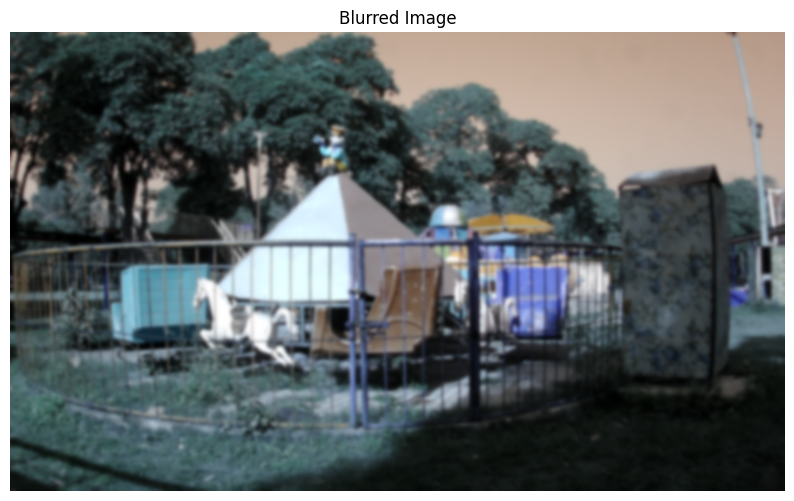

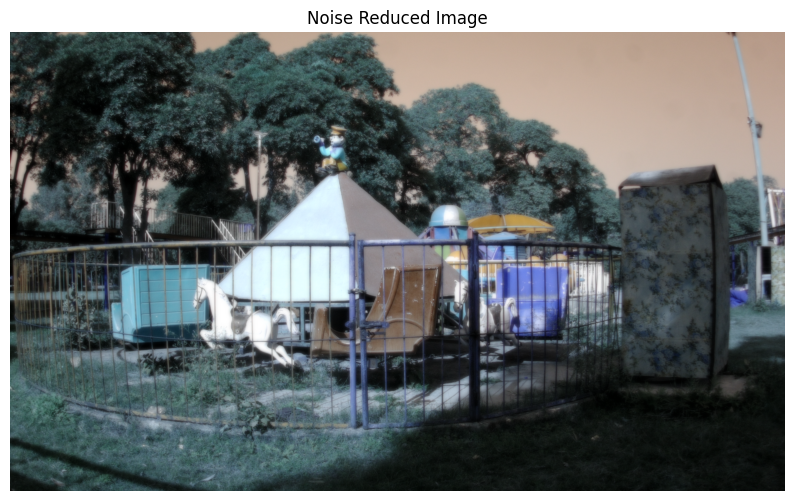

In [ ]:
### 1. Noise Reduction using Addition and Averaging ###
# Create a slightly blurred version of the image
blurred_image = cv2.GaussianBlur(image, (35, 35), 0)
show_image('Blurred Image', blurred_image)

# Add the original image and the blurred image
added_image = cv2.addWeighted(image, 0.5, blurred_image, 0.5, 0)

# Display the noise-reduced image
show_image('Noise Reduced Image', added_image)

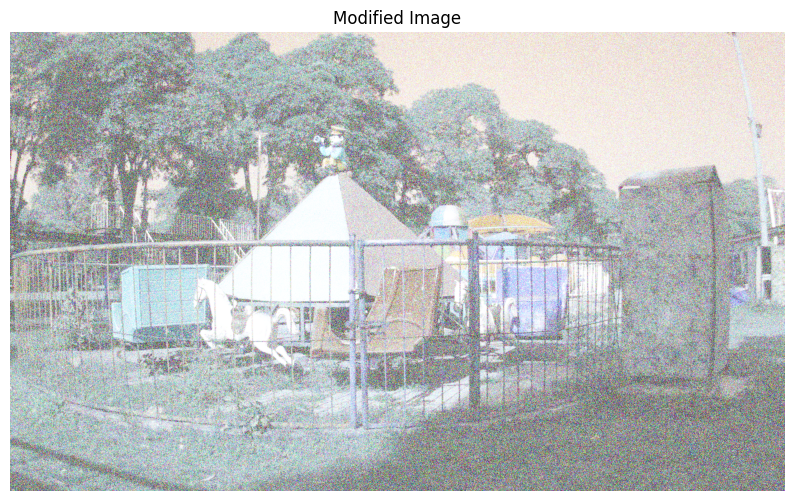

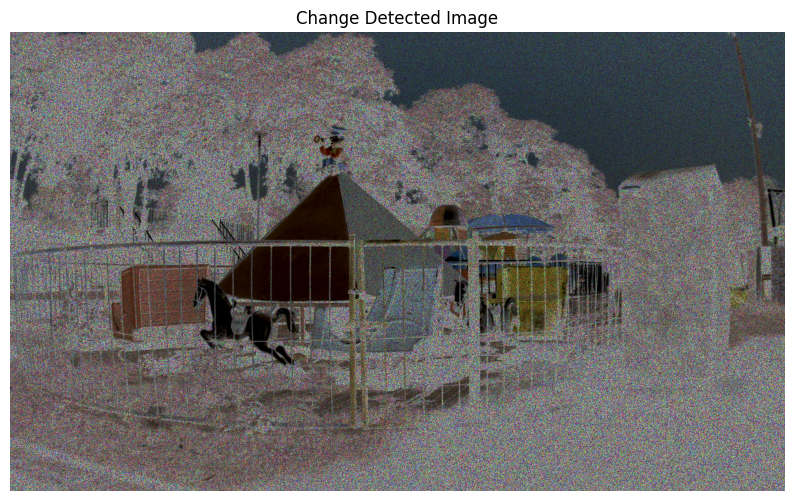

In [ ]:
### 2. Change Detection using Subtraction ###
# Create a modified version of the image by adding noise
noise = np.random.normal(0, 50, image.shape).astype(np.uint8)
modified_image = cv2.add(image, noise)

# Detect changes by subtracting the original image from the modified image
change_detected = cv2.absdiff(image, modified_image)

# Display the modified image and the change-detected image
show_image('Modified Image', modified_image)
show_image('Change Detected Image', change_detected)

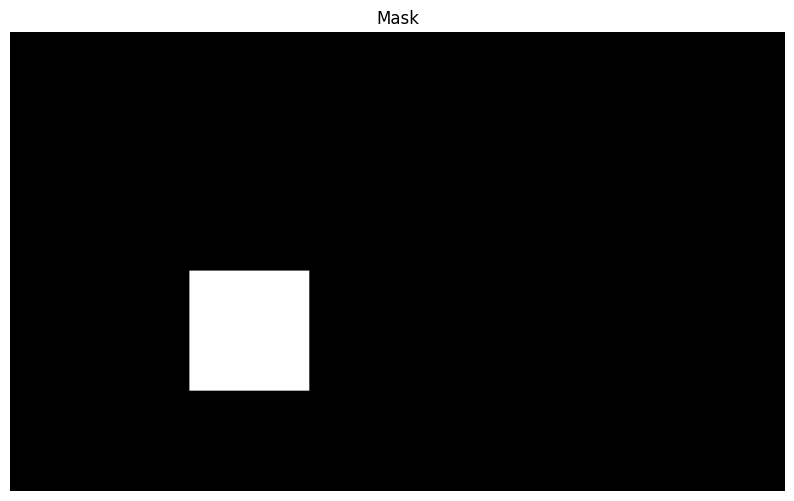

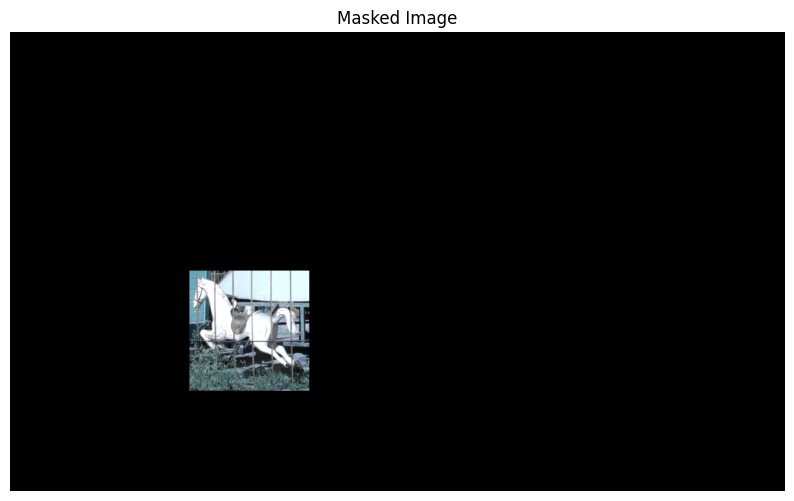

In [ ]:
### 3. Masking using Multiplication ###
# Create a binary mask of the same size as the image
mask = np.zeros(image.shape[:2], dtype=np.uint8)
top_left = (600, 800)
bottom_right = (1000, 1200)
cv2.rectangle(mask, top_left, bottom_right, 1, thickness=-1)

# Convert mask to 3 channels
mask_3ch = cv2.merge([mask, mask, mask])

# Apply the mask using multiplication
masked_image = cv2.multiply(image, mask_3ch)

# Display the mask and the masked image
show_image('Mask', mask * 255)  # Multiply by 255 to display properly
show_image('Masked Image', masked_image)